<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Fixing-demographics-file-(nodes-on-top-of-eachother-screws-up-events)" data-toc-modified-id="Fixing-demographics-file-(nodes-on-top-of-eachother-screws-up-events)-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Fixing demographics file (nodes on top of eachother screws up events)</a></span></li></ul></div>

In [7]:
import numpy as np
import scipy
import random
import matplotlib.pyplot as plt
import pandas as pd
import json

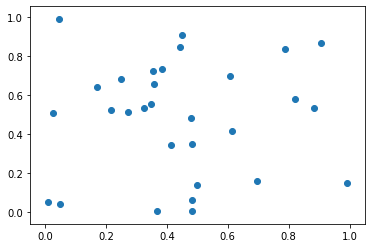

In [7]:
x = np.random.uniform(size=30)
y = np.random.uniform(size=30)
plt.scatter(x,y)

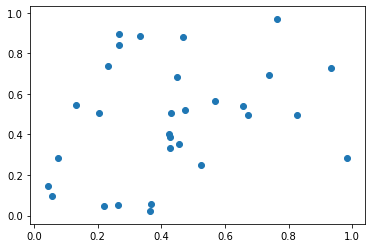

In [25]:
x2 = np.random.uniform(size=30)
y2 = np.random.uniform(size=30)
plt.scatter(x2,y2)

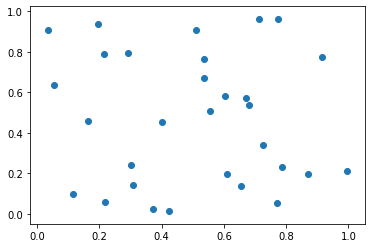

In [52]:
x3 = np.random.uniform(size=30)
y3 = np.random.uniform(size=30)
plt.scatter(x3,y3)

(array([784.,  58.,  14.,   6.,   4.,   2.,   0.,   0.,   0.,   2.]),
 array([ 0.85039714,  5.52739533, 10.20439351, 14.8813917 , 19.55838988,
        24.23538807, 28.91238625, 33.58938444, 38.26638262, 42.94338081,
        47.62037899]),
 <a list of 10 Patch objects>)

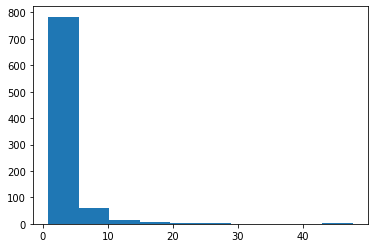

In [75]:
d = np.array([np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2) for a in zip(x2,y2) for b in zip(x2,y2)])
d = d[d>0]
plt.hist(1/d**1.1)

In [80]:
# Let rate be proportional to 1/d

rate_dict = {}

for ni in range(1,31):
    rate_dict[ni] = {}
    for nj in range(1,31):
        if ni != nj:
            i = ni-1
            j = nj-1
            d = np.sqrt((x2[i]-x2[j])**2 + (y2[i]-y2[j])**2)
            rate_dict[ni][nj] = 1/d
            
with open('vector_local_migr_rates.json', 'w') as fp:
    json.dump(rate_dict, fp)

rate_dict.d

In [81]:
rate_dict

{1: {2: 1.4779376445764332,
  3: 1.4580921759322383,
  4: 2.7388466098908886,
  5: 1.9009309356354702,
  6: 2.762144980363878,
  7: 8.20376799958311,
  8: 1.7321128001257748,
  9: 1.4908653053771939,
  10: 2.358722076879546,
  11: 3.322438557388997,
  12: 1.9579350888417355,
  13: 1.9864438760964034,
  14: 1.3937215269665668,
  15: 2.336432847743984,
  16: 8.442375515266486,
  17: 1.5657496813689058,
  18: 1.5568432754016686,
  19: 2.6205052373967637,
  20: 1.5445144183540922,
  21: 1.1328648623203412,
  22: 3.1096180436809977,
  23: 6.531461769497605,
  24: 1.4296939635635628,
  25: 1.0590344277472572,
  26: 2.4715986336476323,
  27: 15.014169719782648,
  28: 1.5389720868692478,
  29: 5.758080829086167,
  30: 3.4682626347236636},
 2: {1: 1.4779376445764332,
  3: 1.4052058979273485,
  4: 3.1514704102544733,
  5: 1.9354683066795373,
  6: 2.1608839410283,
  7: 1.3512368954111735,
  8: 2.269357160874288,
  9: 7.317192451675564,
  10: 3.957771833580101,
  11: 1.2900069108732193,
  12: 2.92

In [83]:
coords_df = pd.DataFrame({
    "node_label": range(1,31),
    "x": x2,
    "y": y2
})

coords_df.to_csv("node_coords.csv", index=False)

In [56]:
def link_function(a,b):
    d = np.sqrt((a[0]-b[0])**2 + (a[1]-b[1])**2)
    
    

,x,y
0,0.214216,0.748031
1,0.713671,0.291568
2,0.032122,0.086819
3,0.511640,0.536253
4,0.736877,0.807718
5,0.575957,0.733376
6,0.100057,0.705297
7,0.288576,0.175510
8,0.607931,0.204987
9,0.526141,0.460900


##  Fixing demographics file (nodes on top of eachother screws up events)

In [26]:
coords_df = pd.read_csv("node_coords.csv")
coords_df["x_centered"] = coords_df["x"]-np.mean(coords_df["x"])
coords_df["y_centered"] = coords_df["y"]-np.mean(coords_df["y"])

In [3]:
with open("demo.json") as fp:
    dd = json.load(fp)

In [19]:
km_to_latlong_factor = 0.01 #rough

for node in dd["Nodes"]:
    ni = node["NodeID"]
    node["NodeAttributes"]["Longitude"] = node["NodeAttributes"]["Longitude"] + km_to_latlong_factor * coords_df["x_centered"].iloc[ni-1]
    node["NodeAttributes"]["Latitude"] = node["NodeAttributes"]["Latitude"] + km_to_latlong_factor * coords_df["y_centered"].iloc[ni-1]

In [24]:
with open("demo_fixedcoords.json","w") as fp:
    json.dump(dd,fp, indent=True)

In [14]:
coords_df["x_centered"].iloc[ni-1]

-0.1874039880841381

In [15]:
coords_df["y_centered"].iloc[ni-1]

0.26978951005905294

In [18]:
 ni["NodeAttributes"]

TypeError: 'int' object is not subscriptable

Text(0, 0.5, 'y')

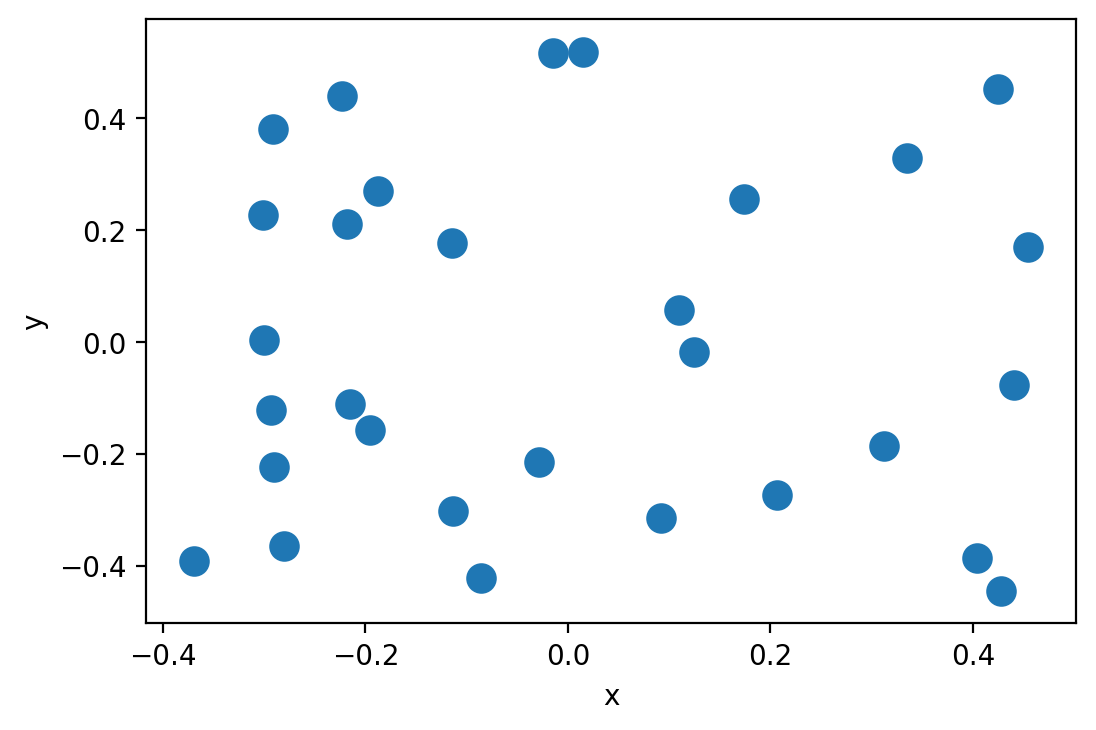

In [32]:
plt.figure(dpi=200)
x = coords_df["x_centered"]
y = coords_df["y_centered"]
plt.scatter(x,y,s=100)
plt.xlabel("x")
plt.ylabel("y")